# Bank Marketing Campaign Project

### Problem Definition

Portuguese bank is having a decrease in its revenue. The bank wants to be able to predict which clients are most likely to subscribe a term deposit so they can focus marketing efforts and resources on them and avoid wasting money and time on clients that will probably not subscribe. 

### Importing Libraries

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


### Loading Data

In [2]:
train = pd.read_excel('../Data/bank-additional-full.xlsx')
train.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
test = pd.read_excel('../Data/bank-additional.xlsx')
test.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


### Data Understanding

In [4]:
print("The shape of the train data is:" + str(train.shape))
print("The shape of the test data is:" + str(test.shape))

The shape of the train data is:(41188, 21)
The shape of the test data is:(4119, 21)


In [5]:
#Checking if there are null values and each feature's type.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
#Checking numerical parameters:
train.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
#Checking of there are any null values at any feature column.
train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
train.duplicated().sum()

12

In [9]:
train.drop_duplicates(subset=None, inplace=True)

In [10]:
test.duplicated().sum()

0

In [11]:
#Let's check which are the features with categories (object type)
train.select_dtypes(object).head(1)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no


In [12]:
#Let's check the categories in each of those features

print("Job:", train.job.value_counts(),sep = '\n')
print("-"*50)
print("Marital status:", train.marital.value_counts(), sep = '\n')
print("-"*50)
print("Education:", train.education.value_counts(), sep = '\n')
print("-"*50)
print("Default credit:", train.default.value_counts(), sep = '\n')
print("-"*50)
print("Housing loan:", train.housing.value_counts(), sep = '\n')
print("-"*50)
print("Personal Loan:", train.loan.value_counts(), sep = '\n')
print("-"*50)
print("Contact method:", train.contact.value_counts(), sep = '\n')
print("-"*50)
print("Month:", train.month.value_counts(), sep = '\n')
print("-"*50)
print("Day_of_week:", train.day_of_week.value_counts(), sep = '\n')
print("-"*50)
print("Previous outcome:", train.poutcome.value_counts(), sep = '\n')
print("-"*50)
print("Outcome in this campaign:", train.y.value_counts(), sep = '\n')


Job:
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
--------------------------------------------------
Marital status:
married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64
--------------------------------------------------
Education:
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64
--------------------------------------------------
Default credit:
no         32577
unknown     8596
yes            3
Name: default, dtype: int64
--------------------------------------------------
Housing

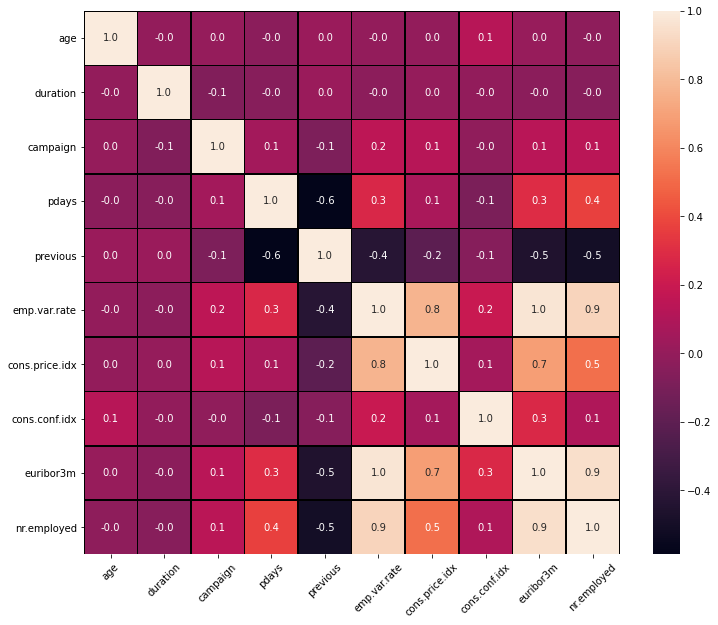

In [13]:
fig = plt.figure(figsize=(12,10))
sns.heatmap(train.corr(), annot=True, linewidths=0.5,linecolor="black",fmt=".1f")
plt.xticks(rotation = 45)
plt.show()


Number of employees rate is highly correlated with employee variation rate and bank interest rates.

Consumer price index is highly correlated with bank interest rate( higher the price index, higher the interest rate)

Employee variation rate also correlates with the bank interest rates

### *Looking for outliers in Age, Duration and Campaign*

In [14]:
#Outliers in Age

stat1= train['age'].describe()
print(stat1)

count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64


In [15]:
IQR = stat1['75%']-stat1['25%']
upper = stat1['75%'] + 1.5*IQR
lower = stat1['25%'] - 1.5*IQR
print('The upper & lower bounds for suspected outliers are {} and {}.'.format(upper,lower))

The upper & lower bounds for suspected outliers are 69.5 and 9.5.


Text(0, 0.5, 'Age')

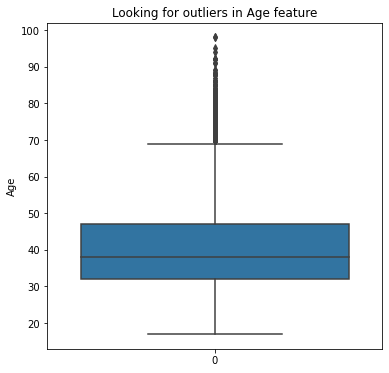

In [16]:
plt.figure(figsize=(6,6))
sns.boxplot(data=train['age'])
plt.title('Looking for outliers in Age feature')
plt.ylabel('Age')

As the minimum number is 17 there is no need to look for the outliers below 9.5

In [17]:
#Outliers in Duration

stat2= train['duration'].describe()
print(stat2)

count    41176.000000
mean       258.315815
std        259.305321
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64


In [18]:
IQR = stat2['75%']-stat2['25%']
upper = stat2['75%'] + 1.5*IQR
lower = stat2['25%'] - 1.5*IQR
print('The upper & lower bounds for suspected outliers are {} and {}.'.format(upper,lower))

The upper & lower bounds for suspected outliers are 644.5 and -223.5.


Text(0, 0.5, 'Duration')

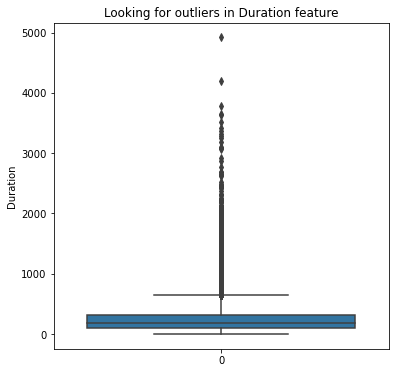

In [19]:
plt.figure(figsize=(6,6))
sns.boxplot(data=train['duration'])
plt.title('Looking for outliers in Duration feature')
plt.ylabel('Duration')

As the min number is 0 there is no need to look for outliers below -223.5

In [20]:
#Outliers in Campaign

stat3= train['campaign'].describe()
print(stat3)

count    41176.000000
mean         2.567879
std          2.770318
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64


In [21]:
IQR = stat3['75%']-stat3['25%']
upper = stat3['75%'] + 1.5*IQR
lower = stat3['25%'] - 1.5*IQR
print('The upper & lower bounds for suspected outliers are {} and {}.'.format(upper,lower))

The upper & lower bounds for suspected outliers are 6.0 and -2.0.


Text(0, 0.5, 'Campaign')

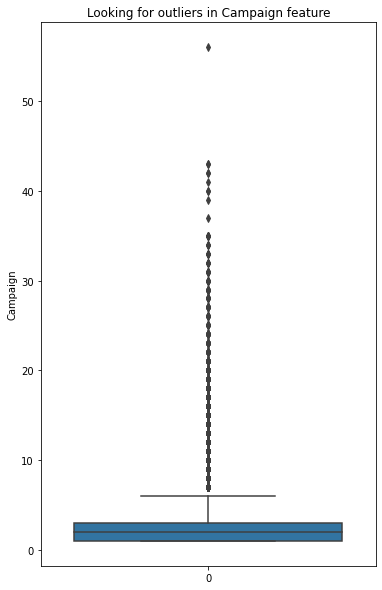

In [22]:
plt.figure(figsize=(6,10))
sns.boxplot(data=train['campaign'])
plt.title('Looking for outliers in Campaign feature')
plt.ylabel('Campaign')

As the minimun number is 1 there is no need to look for outliers below -2.

### Data Cleaning and Transformation

Let's use the most frequent value to replace each of the unknown values in categorical features. Then we will be ready to encode them. 

In [23]:
def replace_with_frequent(df,col):
    frequent = df[col].value_counts().idxmax()
    print("The most frequent value is:", frequent)
    df[col].replace('unknown', frequent , inplace = True)
    print("Replacing unknown values with the most frequent value:", frequent)

Now let's create a function to replace unknown values with the average value, in numerical features. 

In [24]:
def replace_with_avg(df, col):
    average = df[col].mean(axis=0)
    print("The average is:" , average)
    df[col].replace('unknown', average , inplace = True)
    print("Replacing unknown values with average:", average)

In [25]:
#Replacing unknown values in numerical features.
replace_with_avg(train, "age")
replace_with_avg(train, "duration")
replace_with_avg(train, "campaign")

The average is: 40.02380027200311
Replacing unknown values with average: 40.02380027200311
The average is: 258.3158150378861
Replacing unknown values with average: 258.3158150378861
The average is: 2.567879347192539
Replacing unknown values with average: 2.567879347192539


In [26]:
#Replacing unknown values in categorical features.
replace_with_frequent(train, "job")
replace_with_frequent(train, "marital")
replace_with_frequent(train, "education")
replace_with_frequent(train, "default")
replace_with_frequent(train, "housing")
replace_with_frequent(train, "loan")

The most frequent value is: admin.
Replacing unknown values with the most frequent value: admin.
The most frequent value is: married
Replacing unknown values with the most frequent value: married
The most frequent value is: university.degree
Replacing unknown values with the most frequent value: university.degree
The most frequent value is: no
Replacing unknown values with the most frequent value: no
The most frequent value is: yes
Replacing unknown values with the most frequent value: yes
The most frequent value is: no
Replacing unknown values with the most frequent value: no


Handling outliers

In [27]:
outliers_age = train[train['age'] >69.5]
outliers_duration =  train[train['duration'] >644.5]
outliers_campaign =  train[train['campaign'] >6]

In [28]:
new_train = train[(train["age"] < 69.5) & (train["duration"] < 644.5) & (train["campaign"] < 6)]

In [29]:
new_train.shape


(34623, 21)